# This notebook draw some visualizations of the dataset focusing on the distribution of flight delay as it is the target feature

## Importing the need packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [2]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

## Importing the dataset

In [3]:
# Get the current script's directory
current_script_dir = os.getcwd()

# Move up to the parent directory
parent_dir = os.path.dirname(current_script_dir)

# Define the sibling data directory name
data_dir = os.path.join(parent_dir, 'data')

# Use os.path.join to create the full file path
dataset_filename = "prosessed_dataset_2022.csv"
file_path = os.path.join(data_dir, dataset_filename)

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
display(df)

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_STATE_FIPS,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID,DEST_STATE_FIPS,DEST_WAC,CRS_DEP_TIME,DEP_TIME_BLK,CRS_ARR_TIME,ARR_TIME_BLK,CRS_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,FLIGHTS,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1,1,1,6,20363,N138EV,4732,10135,30135,42,23,11433,31295,26,43,1015,1000-1059,1209,1200-1259,114,425,2,1,-1,0,0,-1,0,0,0,0,0
1,1,1,1,6,20363,N138EV,5430,11433,31295,26,43,10135,30135,42,23,1422,1400-1459,1548,1500-1559,86,425,2,1,-3,0,0,-1,0,0,0,0,0
2,1,1,1,6,20363,N147PQ,4671,10397,30397,13,34,14783,34783,29,64,2057,2000-2059,2149,2100-2159,112,563,3,1,-5,0,0,-1,0,0,0,0,0
3,1,1,1,6,20363,N147PQ,5009,13487,31650,27,63,11423,31423,19,61,1041,1000-1059,1153,1100-1159,72,232,1,1,-3,0,0,-1,0,0,0,0,0
4,1,1,1,6,20363,N147PQ,5083,11423,31423,19,61,10397,30397,13,34,1300,1300-1359,1610,1600-1659,130,743,3,1,-3,0,0,-1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6551768,4,12,31,6,20452,N882RW,5741,12953,31703,36,22,11066,31066,39,44,830,0800-0859,1038,1000-1059,128,479,2,1,-7,0,0,-1,0,0,0,0,0
6551769,4,12,31,6,20452,N979RP,3607,14321,34321,23,12,13930,30977,17,41,635,0600-0659,758,0700-0759,143,900,4,1,-7,0,0,-1,0,0,25,0,0
6551770,4,12,31,6,20452,N979RP,3686,13930,30977,17,41,14321,34321,23,12,1800,1800-1859,2129,2100-2159,149,900,4,1,-7,0,0,-1,0,0,0,0,0
6551771,4,12,31,6,20452,N979RP,3699,11003,31003,19,61,13930,30977,17,41,1508,1500-1559,1627,1600-1659,79,196,1,1,-10,0,0,-1,0,0,0,0,0


# QUARTER, MONTH, DAY_OF_MONTH, DAY_OF_WEEK
- Make histogram plot that shows the distribution of DEP_DELAY across the categories of features above

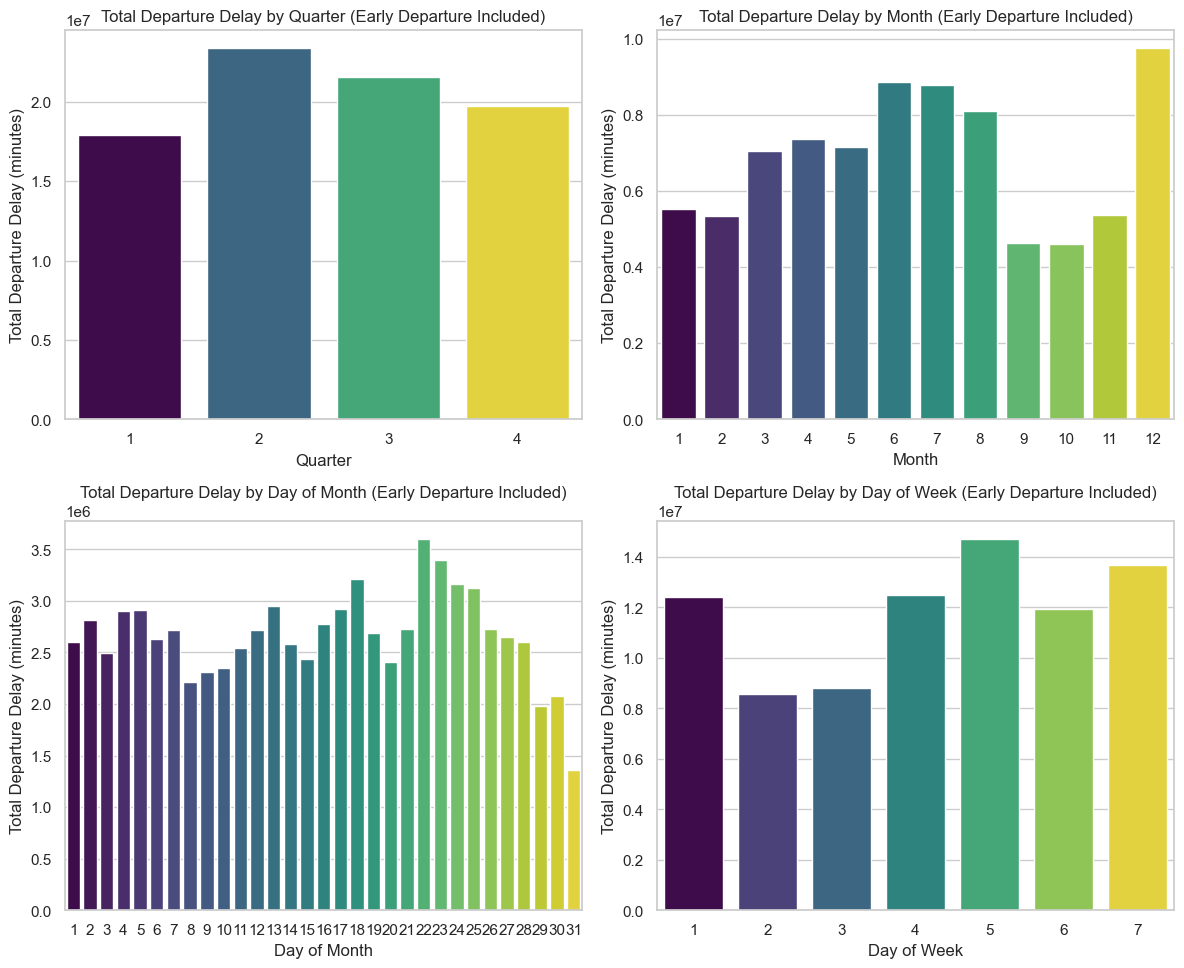

In [4]:
# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Group by QUARTER and sum DEP_DELAY
quarterly_delay = df.groupby('QUARTER')['DEP_DELAY'].sum().reset_index()
# Plot the distibution of departure delay across quaters (Top Left Plot)
sns.barplot(data=quarterly_delay, x='QUARTER', y='DEP_DELAY', hue='QUARTER', palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title('Total Departure Delay by Quarter (Early Departure Included)')
axs[0, 0].set_xlabel('Quarter')
axs[0, 0].set_ylabel('Total Departure Delay (minutes)')
axs[0, 0].legend().set_visible(False)  # Disable the legend

# Group by MONTH and sum DEP_DELAY
monthly_delay = df.groupby('MONTH')['DEP_DELAY'].sum().reset_index()
# Plot the distibution of departure delay across months (Top Right Plot)
sns.barplot(data=monthly_delay, x='MONTH', y='DEP_DELAY', hue='MONTH', palette='viridis', ax=axs[0, 1])
axs[0, 1].set_title('Total Departure Delay by Month (Early Departure Included)')
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('Total Departure Delay (minutes)')
axs[0, 1].legend().set_visible(False)  # Disable the legend

# Group by DAY_OF_MONTH and sum DEP_DELAY
month_day_delay = df.groupby('DAY_OF_MONTH')['DEP_DELAY'].sum().reset_index()
# Plot the distibution of departure delay across day of month (Bottom Left Plot)
sns.barplot(data=month_day_delay, x='DAY_OF_MONTH', y='DEP_DELAY', hue='DAY_OF_MONTH', palette='viridis', ax=axs[1, 0])
axs[1, 0].set_title('Total Departure Delay by Day of Month (Early Departure Included)')
axs[1, 0].set_xlabel('Day of Month')
axs[1, 0].set_ylabel('Total Departure Delay (minutes)')
axs[1, 0].legend().set_visible(False)  # Disable the legend

# Group by DAY_OF_WEEK and sum DEP_DELAY
month_daily_delay = df.groupby('DAY_OF_WEEK')['DEP_DELAY'].sum().reset_index()
# Plot the distibution of departure delay across months (Bottom Right Plot)
sns.barplot(data=month_daily_delay, x='DAY_OF_WEEK', y='DEP_DELAY', hue='DAY_OF_WEEK', palette='viridis', ax=axs[1, 1])
axs[1, 1].set_title('Total Departure Delay by Day of Week (Early Departure Included)')
axs[1, 1].set_xlabel('Day of Week')
axs[1, 1].set_ylabel('Total Departure Delay (minutes)')
axs[1, 1].legend().set_visible(False)  # Disable the legend

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# OP_CARRIER_AIRLINE_ID, TAIL_NUM, OP_CARRIER_FL_NUM
- Make pie plot that shows the distribution of DEP_DELAY across airlines, focusing on airlines with top delays
- Make 2 box plots; one for delays grouped by tail numbers of aircrafts, and one for delays grouped by flight/route number

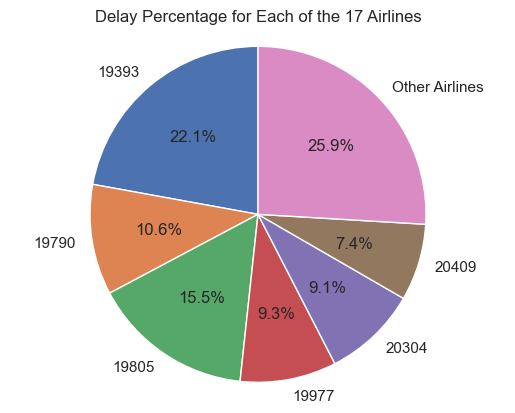

In [5]:
# Group by OP_CARRIER_AIRLINE_ID and sum DEP_DELAY
delay_per_OP_CARRIER_AIRLINE_ID  = df.groupby('OP_CARRIER_AIRLINE_ID')['DEP_DELAY'].sum().reset_index()

# Sample data
labels = delay_per_OP_CARRIER_AIRLINE_ID['OP_CARRIER_AIRLINE_ID']
sizes = delay_per_OP_CARRIER_AIRLINE_ID['DEP_DELAY']

# Calculate percentages
total = sum(sizes)
percentages = [size / total * 100 for size in sizes]

# Separate large categories and calculate the "Others" category
filtered_labels = []
filtered_sizes = []
others_size = 0

for label, size, percentage in zip(labels, sizes, percentages):
    if percentage > 7:
        filtered_labels.append(label)
        filtered_sizes.append(size)
    else:
        others_size += size

# If there are any "Others", add them to the filtered data
if others_size > 0:
    filtered_labels.append('Other Airlines')
    filtered_sizes.append(others_size)

# Create a pie plot
plt.pie(filtered_sizes, labels=filtered_labels, autopct='%1.1f%%', startangle=90)
plt.title(f'Delay Percentage for Each of the {len(labels)} Airlines')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

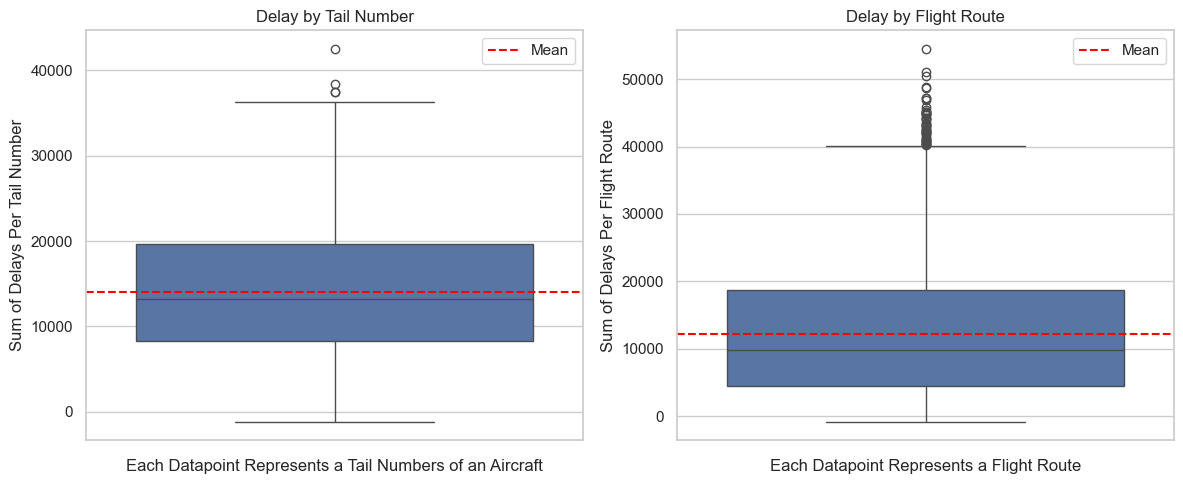

In [6]:
# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Group by TAIL_NUM and sum DEP_DELAY
delay_per_TAIL_NUM  = df.groupby('TAIL_NUM')['DEP_DELAY'].sum().reset_index()
sns.boxplot(ax=axes[0], data=delay_per_TAIL_NUM['DEP_DELAY'])
mean_of_delay_per_tail_number = delay_per_TAIL_NUM['DEP_DELAY'].mean()
axes[0].axhline(mean_of_delay_per_tail_number, color='red', linestyle='--', label='Mean')
axes[0].set_title('Delay by Tail Number')
axes[0].set_xlabel('Each Datapoint Represents a Tail Numbers of an Aircraft')
axes[0].set_ylabel('Sum of Delays Per Tail Number')
axes[0].legend()

# Group by OP_CARRIER_FL_NUM and sum DEP_DELAY
delay_per_OP_CARRIER_FL_NUM  = df.groupby('OP_CARRIER_FL_NUM')['DEP_DELAY'].sum().reset_index()
sns.boxplot(data=delay_per_OP_CARRIER_FL_NUM['DEP_DELAY'], ax=axes[1])
mean_of_delay_per_flight_route = delay_per_OP_CARRIER_FL_NUM['DEP_DELAY'].mean()
axes[1].axhline(mean_of_delay_per_flight_route, color='red', linestyle='--', label='Mean')
axes[1].set_title('Delay by Flight Route')
axes[1].set_xlabel('Each Datapoint Represents a Flight Route')
axes[1].set_ylabel('Sum of Delays Per Flight Route')
axes[1].legend()

# Display the plots
plt.tight_layout()
plt.show()

# ORIGIN_AIRPORT_ID, ORIGIN_CITY_MARKET_ID, ORIGIN_STATE_FIPS, ORIGIN_WAC
- Make 4 pie plot that shows the distribution of DEP_DELAY across airlines, focusing on origins with top delays

In [7]:
# Function to filter and view top sizes for better visibility in pie plots
def filter_sizes(labels, sizes, percentage_view_threshold):
    # Calculate percentages
    total = sum(sizes)
    percentages = [size / total * 100 for size in sizes]
    
    # Separate large categories and calculate the "Others" category
    filtered_labels = []
    filtered_sizes = []
    others_size = 0

    # Filter sizes and labels to keep the labels with top sizes
    for label, size, percentage in zip(labels, sizes, percentages):
        if percentage > percentage_view_threshold:
            filtered_labels.append(label)
            filtered_sizes.append(size)
        else:
            others_size += size

    # If there are any "Others", add them to the filtered data
    if others_size > 0:
        filtered_labels.append('Others')
        filtered_sizes.append(others_size)

    return filtered_sizes, filtered_labels

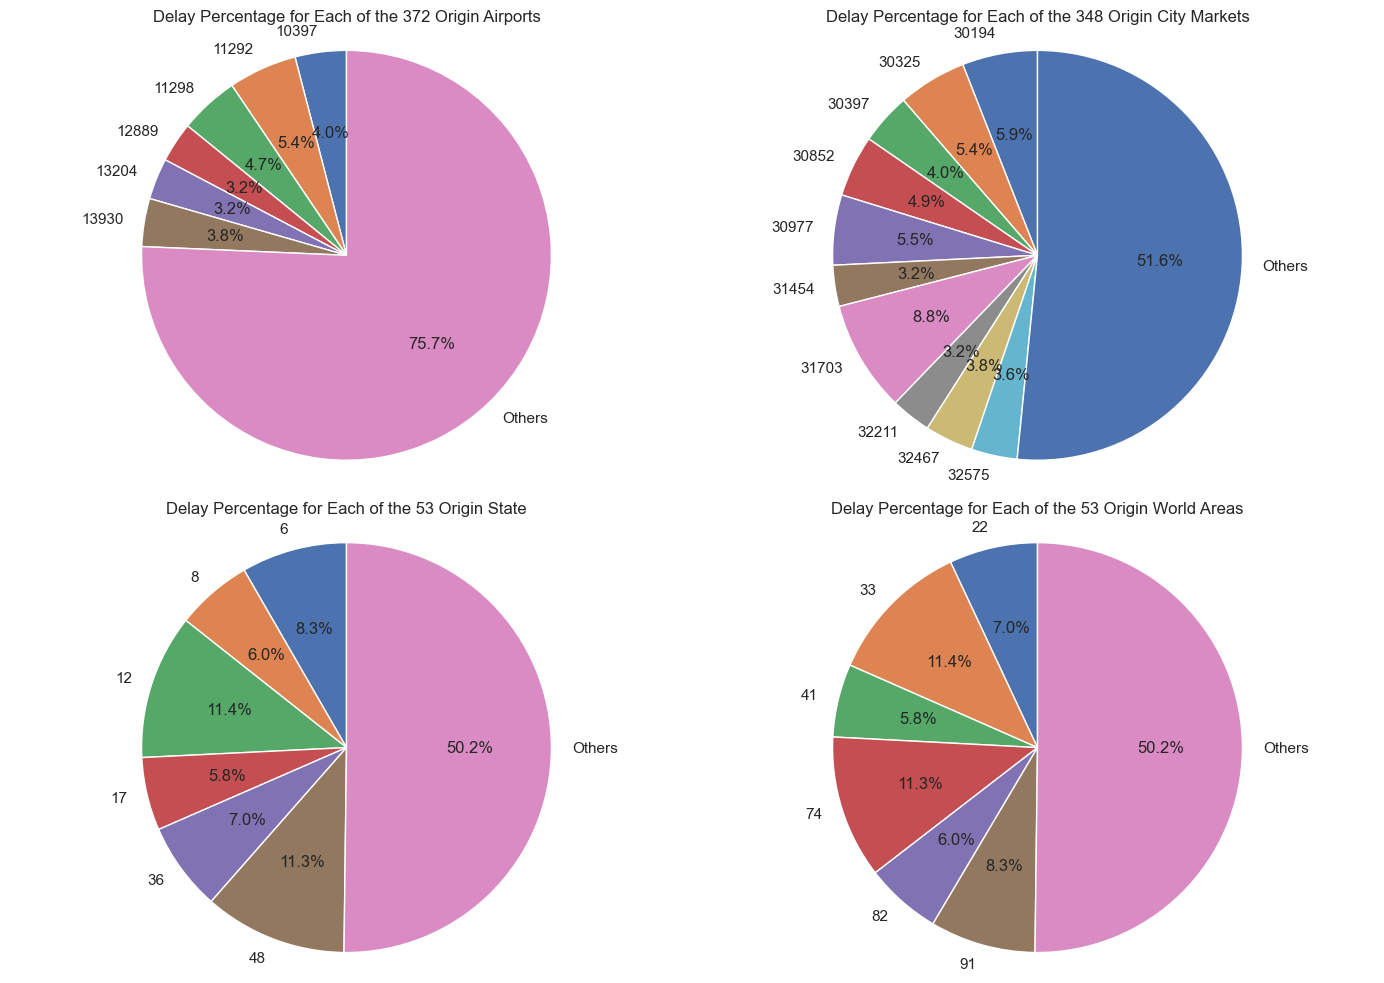

In [8]:
# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Group by ORIGIN_AIRPORT_ID and sum DEP_DELAY
delay_per_ORIGIN_AIRPORT_ID  = df.groupby('ORIGIN_AIRPORT_ID')['DEP_DELAY'].sum().reset_index()
filtered_sizes, filtered_labels = filter_sizes(
    labels=delay_per_ORIGIN_AIRPORT_ID['ORIGIN_AIRPORT_ID'], 
    sizes=delay_per_ORIGIN_AIRPORT_ID['DEP_DELAY'], 
    percentage_view_threshold=3
)
axs[0, 0].pie(filtered_sizes, labels=filtered_labels, autopct='%1.1f%%', startangle=90)
axs[0, 0].axis('equal')  # Equal aspect ratio ensures the pie chart is circular
axs[0, 0].set_title(f'Delay Percentage for Each of the {len(delay_per_ORIGIN_AIRPORT_ID)} Origin Airports')

# Group by ORIGIN_CITY_MARKET_ID and sum DEP_DELAY
delay_per_ORIGIN_CITY_MARKET_ID  = df.groupby('ORIGIN_CITY_MARKET_ID')['DEP_DELAY'].sum().reset_index()
filtered_sizes, filtered_labels = filter_sizes(
    labels=delay_per_ORIGIN_CITY_MARKET_ID['ORIGIN_CITY_MARKET_ID'], 
    sizes=delay_per_ORIGIN_CITY_MARKET_ID['DEP_DELAY'], 
    percentage_view_threshold=3
)
axs[0, 1].pie(filtered_sizes, labels=filtered_labels, autopct='%1.1f%%', startangle=90)
axs[0, 1].axis('equal')  # Equal aspect ratio ensures the pie chart is circular
axs[0, 1].set_title(f'Delay Percentage for Each of the {len(delay_per_ORIGIN_CITY_MARKET_ID)} Origin City Markets')

# Group by ORIGIN_STATE_FIPS and sum DEP_DELAY
delay_per_ORIGIN_STATE_FIPS  = df.groupby('ORIGIN_STATE_FIPS')['DEP_DELAY'].sum().reset_index()
filtered_sizes, filtered_labels = filter_sizes(
    labels=delay_per_ORIGIN_STATE_FIPS['ORIGIN_STATE_FIPS'], 
    sizes=delay_per_ORIGIN_STATE_FIPS['DEP_DELAY'], 
    percentage_view_threshold=5
)
axs[1, 0].pie(filtered_sizes, labels=filtered_labels, autopct='%1.1f%%', startangle=90)
axs[1, 0].axis('equal')  # Equal aspect ratio ensures the pie chart is circular
axs[1, 0].set_title(f'Delay Percentage for Each of the {len(delay_per_ORIGIN_STATE_FIPS)} Origin State')

# Group by ORIGIN_WAC and sum DEP_DELAY
delay_per_ORIGIN_WAC  = df.groupby('ORIGIN_WAC')['DEP_DELAY'].sum().reset_index()
filtered_sizes, filtered_labels = filter_sizes(
    labels=delay_per_ORIGIN_WAC['ORIGIN_WAC'], 
    sizes=delay_per_ORIGIN_WAC['DEP_DELAY'], 
    percentage_view_threshold=5
)
axs[1, 1].pie(filtered_sizes, labels=filtered_labels, autopct='%1.1f%%', startangle=90)
axs[1, 1].axis('equal')  # Equal aspect ratio ensures the pie chart is circular
axs[1, 1].set_title(f'Delay Percentage for Each of the {len(delay_per_ORIGIN_WAC)} Origin World Areas')

# Adjust layout
plt.tight_layout()
plt.show()

# DEST_AIRPORT_ID, DEST_CITY_MARKET_ID, DEST_STATE_FIPS, DEST_WAC
- Make 4 pie plot that shows the distribution of DEP_DELAY across airlines, focusing on destinations with top delays

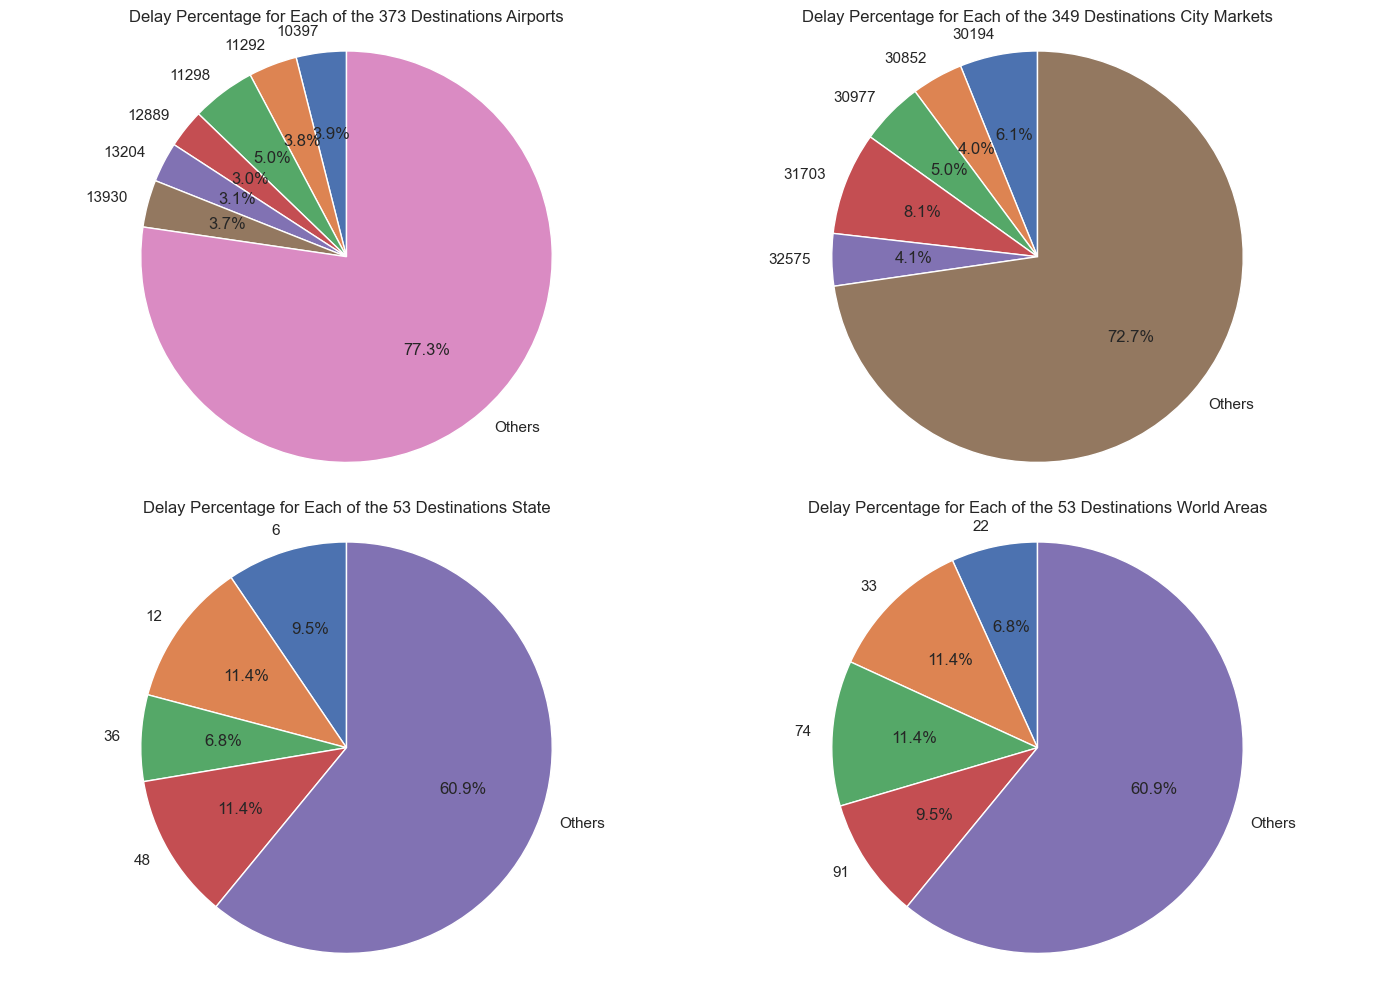

In [9]:
# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Group by DEST_AIRPORT_ID and sum DEP_DELAY
delay_per_DEST_AIRPORT_ID  = df.groupby('DEST_AIRPORT_ID')['DEP_DELAY'].sum().reset_index()
filtered_sizes, filtered_labels = filter_sizes(
    labels=delay_per_DEST_AIRPORT_ID['DEST_AIRPORT_ID'], 
    sizes=delay_per_DEST_AIRPORT_ID['DEP_DELAY'], 
    percentage_view_threshold=3
)
axs[0, 0].pie(filtered_sizes, labels=filtered_labels, autopct='%1.1f%%', startangle=90)
axs[0, 0].axis('equal')  # Equal aspect ratio ensures the pie chart is circular
axs[0, 0].set_title(f'Delay Percentage for Each of the {len(delay_per_DEST_AIRPORT_ID)} Destinations Airports')

# Group by DEST_CITY_MARKET_ID and sum DEP_DELAY
delay_per_DEST_CITY_MARKET_ID  = df.groupby('DEST_CITY_MARKET_ID')['DEP_DELAY'].sum().reset_index()
filtered_sizes, filtered_labels = filter_sizes(
    labels=delay_per_DEST_CITY_MARKET_ID['DEST_CITY_MARKET_ID'], 
    sizes=delay_per_DEST_CITY_MARKET_ID['DEP_DELAY'], 
    percentage_view_threshold=4
)
axs[0, 1].pie(filtered_sizes, labels=filtered_labels, autopct='%1.1f%%', startangle=90)
axs[0, 1].axis('equal')  # Equal aspect ratio ensures the pie chart is circular
axs[0, 1].set_title(f'Delay Percentage for Each of the {len(delay_per_DEST_CITY_MARKET_ID)} Destinations City Markets')

# Group by DEST_STATE_FIPS and sum DEP_DELAY
delay_per_DEST_STATE_FIPS  = df.groupby('DEST_STATE_FIPS')['DEP_DELAY'].sum().reset_index()
filtered_sizes, filtered_labels = filter_sizes(
    labels=delay_per_DEST_STATE_FIPS['DEST_STATE_FIPS'], 
    sizes=delay_per_DEST_STATE_FIPS['DEP_DELAY'], 
    percentage_view_threshold=6
)
axs[1, 0].pie(filtered_sizes, labels=filtered_labels, autopct='%1.1f%%', startangle=90)
axs[1, 0].axis('equal')  # Equal aspect ratio ensures the pie chart is circular
axs[1, 0].set_title(f'Delay Percentage for Each of the {len(delay_per_DEST_STATE_FIPS)} Destinations State')

# Group by DEST_WAC and sum DEP_DELAY
delay_per_DEST_WAC  = df.groupby('DEST_WAC')['DEP_DELAY'].sum().reset_index()
filtered_sizes, filtered_labels = filter_sizes(
    labels=delay_per_DEST_WAC['DEST_WAC'], 
    sizes=delay_per_DEST_WAC['DEP_DELAY'], 
    percentage_view_threshold=6
)
axs[1, 1].pie(filtered_sizes, labels=filtered_labels, autopct='%1.1f%%', startangle=90)
axs[1, 1].axis('equal')  # Equal aspect ratio ensures the pie chart is circular
axs[1, 1].set_title(f'Delay Percentage for Each of the {len(delay_per_DEST_WAC)} Destinations World Areas')

# Adjust layout
plt.tight_layout()
plt.show()

# CRS_DEP_TIME, CRS_ARR_TIME
- Make 4 histogram plots that shows the distribution of DEP_DELAY across schedualed departures and arrival for both hours and minutes.

In [10]:
# Function to extract hours from schedualed time
def extract_hours(time):
    # Pad with zero if necessary to ensure it has 4 digits
    time_str = str(time).zfill(4)
    return int(time_str[:2])  # Get the first two characters as hours

# Function to extract minutes from schedualed time
def extract_minutes(time):
    # Pad with zero if necessary to ensure it has 4 digits
    time_str = str(time).zfill(4)
    return int(time_str[2:])  # Get the last two characters as hours

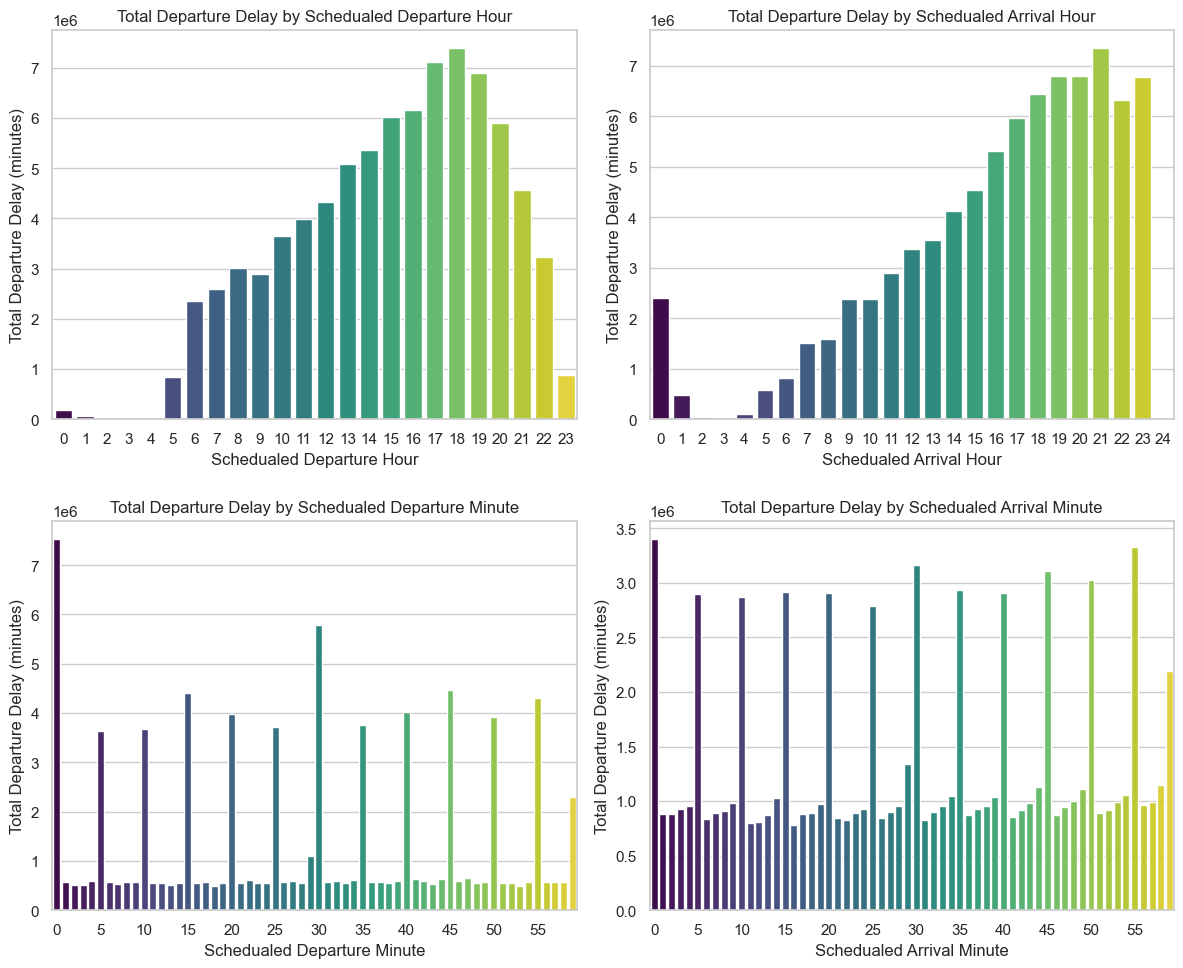

In [11]:
CRS_TIME_df = df[['CRS_DEP_TIME', 'CRS_ARR_TIME', 'DEP_DELAY']].copy()

# Apply the function to create a new column for hours
CRS_TIME_df['CRS_DEP_HOUR'] = CRS_TIME_df['CRS_DEP_TIME'].apply(extract_hours)
CRS_TIME_df['CRS_ARR_HOUR'] = CRS_TIME_df['CRS_ARR_TIME'].apply(extract_hours)
# Apply the function to create a new column for minutes
CRS_TIME_df['CRS_DEP_MINUTE'] = CRS_TIME_df['CRS_DEP_TIME'].apply(extract_minutes)
CRS_TIME_df['CRS_ARR_MINUTE'] = CRS_TIME_df['CRS_ARR_TIME'].apply(extract_minutes)

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Group by CRS_DEP_HOUR and sum DEP_DELAY
delay_per_CRS_DEP_HOUR  = CRS_TIME_df.groupby('CRS_DEP_HOUR')['DEP_DELAY'].sum().reset_index()
# Plot the distibution of departure delay across schedualed departure hours (Top Left Plot)
sns.barplot(data=delay_per_CRS_DEP_HOUR, x='CRS_DEP_HOUR', y='DEP_DELAY', hue='CRS_DEP_HOUR', palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title('Total Departure Delay by Schedualed Departure Hour')
axs[0, 0].set_xlabel('Schedualed Departure Hour')
axs[0, 0].set_ylabel('Total Departure Delay (minutes)')
axs[0, 0].legend().set_visible(False)  # Disable the legend

# Group by CRS_ARR_HOUR and sum DEP_DELAY
delay_per_CRS_ARR_HOUR  = CRS_TIME_df.groupby('CRS_ARR_HOUR')['DEP_DELAY'].sum().reset_index()
# Plot the distibution of departure delay across schedualed arrival hours (Top Right Plot)
sns.barplot(data=delay_per_CRS_ARR_HOUR, x='CRS_ARR_HOUR', y='DEP_DELAY', hue='CRS_ARR_HOUR', palette='viridis', ax=axs[0, 1])
axs[0, 1].set_title('Total Departure Delay by Schedualed Arrival Hour')
axs[0, 1].set_xlabel('Schedualed Arrival Hour')
axs[0, 1].set_ylabel('Total Departure Delay (minutes)')
axs[0, 1].legend().set_visible(False)  # Disable the legend

# Group by CRS_DEP_MINUTE and sum DEP_DELAY
delay_per_CRS_DEP_MINUTE  = CRS_TIME_df.groupby('CRS_DEP_MINUTE')['DEP_DELAY'].sum().reset_index()
# Plot the distibution of departure delay across schedualed departure minutes (Bottom Left Plot)
sns.barplot(data=delay_per_CRS_DEP_MINUTE, x='CRS_DEP_MINUTE', y='DEP_DELAY', hue='CRS_DEP_MINUTE', palette='viridis', ax=axs[1, 0])
axs[1, 0].set_title('Total Departure Delay by Schedualed Departure Minute')
axs[1, 0].set_xlabel('Schedualed Departure Minute')
axs[1, 0].set_ylabel('Total Departure Delay (minutes)')
axs[1, 0].set_xticks(np.arange(0, 60, 5))
axs[1, 0].legend().set_visible(False)  # Disable the legend

# Group by CRS_ARR_MINUTE and sum DEP_DELAY
delay_per_CRS_ARR_MINUTE  = CRS_TIME_df.groupby('CRS_ARR_MINUTE')['DEP_DELAY'].sum().reset_index()
# Plot the distibution of departure delay across schedualed arrival minutes (Bottom Right Plot)
sns.barplot(data=delay_per_CRS_ARR_MINUTE, x='CRS_ARR_MINUTE', y='DEP_DELAY', hue='CRS_ARR_MINUTE', palette='viridis', ax=axs[1, 1])
axs[1, 1].set_title('Total Departure Delay by Schedualed Arrival Minute')
axs[1, 1].set_xlabel('Schedualed Arrival Minute')
axs[1, 1].set_ylabel('Total Departure Delay (minutes)')
axs[1, 1].set_xticks(np.arange(0, 60, 5))
axs[1, 1].legend().set_visible(False)  # Disable the legend

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# DEP_TIME_BLK, ARR_TIME_BLK
- Make 2 histogram plots that shows the distribution of DEP_DELAY across schedualed departures and arrival in a time block

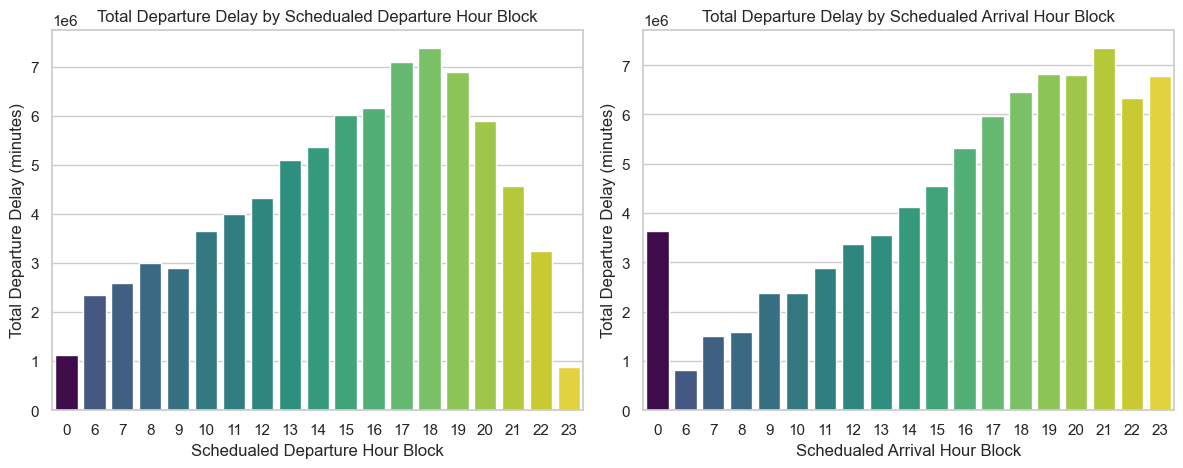

In [12]:
CRS_TIME_BLK_df = df[['DEP_TIME_BLK', 'ARR_TIME_BLK', 'DEP_DELAY']].copy()

# Apply the function to create a new column for hours
CRS_TIME_BLK_df['DEP_TIME_BLK_HOUR'] = CRS_TIME_BLK_df['DEP_TIME_BLK'].apply(extract_hours)
CRS_TIME_BLK_df['ARR_TIME_BLK_HOUR'] = CRS_TIME_BLK_df['ARR_TIME_BLK'].apply(extract_hours)

# Create a 2x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Group by DEP_TIME_BLK and sum DEP_DELAY
delay_per_DEP_TIME_BLK_HOUR = CRS_TIME_BLK_df.groupby('DEP_TIME_BLK_HOUR')['DEP_DELAY'].sum().reset_index()
# Plot the distibution of departure delay across schedualed departure hours (Left Plot)
sns.barplot(data=delay_per_DEP_TIME_BLK_HOUR, x='DEP_TIME_BLK_HOUR', y='DEP_DELAY', hue='DEP_TIME_BLK_HOUR', palette='viridis', ax=axes[0])
axes[0].set_title('Total Departure Delay by Schedualed Departure Hour Block')
axes[0].set_xlabel('Schedualed Departure Hour Block')
axes[0].set_ylabel('Total Departure Delay (minutes)')
axes[0].legend().set_visible(False)  # Disable the legend

# Group by ARR_TIME_BLK and sum DEP_DELAY
delay_per_ARR_TIME_BLK_HOUR = CRS_TIME_BLK_df.groupby('ARR_TIME_BLK_HOUR')['DEP_DELAY'].sum().reset_index()
# Plot the distibution of departure delay across schedualed arrival hours (Right Plot)
sns.barplot(data=delay_per_ARR_TIME_BLK_HOUR, x='ARR_TIME_BLK_HOUR', y='DEP_DELAY', hue='ARR_TIME_BLK_HOUR', palette='viridis', ax=axes[1])
axes[1].set_title('Total Departure Delay by Schedualed Arrival Hour Block')
axes[1].set_xlabel('Schedualed Arrival Hour Block')
axes[1].set_ylabel('Total Departure Delay (minutes)')
axes[1].legend().set_visible(False)  # Disable the legend

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
df.columns

Index(['QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'OP_CARRIER_AIRLINE_ID', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN_STATE_FIPS',
       'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_CITY_MARKET_ID',
       'DEST_STATE_FIPS', 'DEST_WAC', 'CRS_DEP_TIME', 'DEP_TIME_BLK',
       'CRS_ARR_TIME', 'ARR_TIME_BLK', 'CRS_ELAPSED_TIME', 'DISTANCE',
       'DISTANCE_GROUP', 'FLIGHTS', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_DELAY_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')